In [29]:
#-*- coding=utf-8 -*-
import requests
import json
import time
import hashlib
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from numpy import linalg as LA
from os import listdir
from os.path import isfile, join
from datetime import datetime
import os, sys, errno
import threading
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
%matplotlib inline


class Bolean_Band:
    def __init__(self, Points_number = 5 ):
        self.Points_number = Points_number
        self.DataBuffer = np()
        self.DataBuffer_Index = 0
        self.BBABD_Mean = 0
        self.BBABD_Upper = 0
        self.BBABD_Lower = 0
    
    def computer_BBand(self, Data):
        
        return (MagX**2 + MagY **2 + MagZ**2)**(0.5)

In [32]:
buffer = np([])

TypeError: 'module' object is not callable

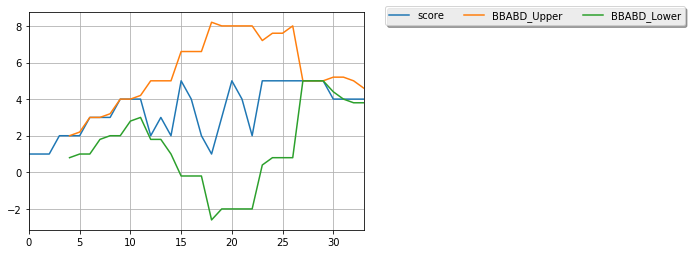

In [24]:
# Create data
data = {'score': [1,1,1,2,2,2,3,3,3,4,4,4,2,3,2,5,4,2,1,3,5,4,2,5,5,5,5,5,5,5,4,4,4,4]}

# Create dataframe
df = pd.DataFrame(data)
rollingdata = df.rolling(window=5)
MA = rollingdata.mean()
MA_Var = rollingdata.var()
newdf = df
newdf["BBABD_Mean"]  = MA
newdf["BBABD_Upper"] = MA + 2 * MA_Var
newdf["BBABD_Lower"] = MA - 2 * MA_Var

newdf.plot(x = newdf.index, y = ['score', 'BBABD_Upper','BBABD_Lower',], grid = True)
plt.legend(bbox_to_anchor = (1.05, 1.05), ncol = 3, fancybox = True, shadow = True)

In [13]:
# Calculate the moving average. That is, take
# the first two values, average them, 
# then drop the first and add the third, etc.
rollingdata = df.rolling(window=5)
MA = rollingdata.mean()
MA_Var = rollingdata.var()
newdf = df
newdf["BBABD_Mean"] = MA
newdf["BBABD_Upper"] = MA + 2* MA_Var
newdf["BBABD_Lower"] = MA - 2* MA_Var

newdf.plot(x = newdf.index, y = ['score', 'BBABD_Upper','BBABD_Lower',], grid = True)
plt.legend(bbox_to_anchor = (1.05, 1.05), ncol = 3, fancybox = True, shadow = True)

In [15]:
newdf.head(10)

,score,BBABD_Mean,BBABD_Upper,BBABD_Lower
0,1,NaN,NaN,NaN
1,1,NaN,NaN,NaN
2,1,NaN,NaN,NaN
3,2,NaN,NaN,NaN
4,2,1.4,2.0,0.8
5,2,1.6,2.2,1.0
6,3,2.0,3.0,1.0
7,3,2.4,3.0,1.8
8,3,2.6,3.2,2.0
9,4,3.0,4.0,2.0


In [22]:
newdf.index

0

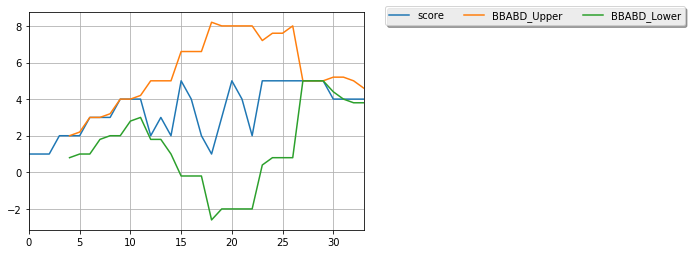

In [23]:
newdf.plot(x = newdf.index, y = ['score', 'BBABD_Upper','BBABD_Lower',], grid = True)
plt.legend(bbox_to_anchor = (1.05, 1.05), ncol = 3, fancybox = True, shadow = True)